In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("Step 1: Libraries imported")

Step 1: Libraries imported


In [4]:
# Step 2: Create Directory Structure
os.makedirs('data/raw', exist_ok=True)
os.makedirs('data/preprocessed', exist_ok=True)

print("Step 2: Directory structure created")

Step 2: Directory structure created


In [7]:
# Step 3: Load and Clean Raw Data
# Load the raw Wholesale.csv file
df = pd.read_csv('data/raw/Wholesale.csv', header=None)

print(f"Original data shape: {df.shape}")

# Remove first column and first 3 rows as specified
df = df.iloc[3:, 1:]  # Remove first 3 rows and first column
df.columns = df.iloc[0]  # Set column names from first row
df = df[1:]  # Remove the header row from data
df.reset_index(drop=True, inplace=True)

print(f"Cleaned data shape: {df.shape}")
print("Step 3: First column and 3 rows removed")

Original data shape: (7042, 16)
Cleaned data shape: (7038, 15)
Step 3: First column and 3 rows removed


In [8]:
# Step 4: Rename Columns and Inspect Data
# Rename columns for consistency
df.columns = ['Year', 'Location', 'Variety', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("Column names:", df.columns.tolist())
print("First 5 rows:")
print(df.head())
print("Step 4: Columns renamed and data inspected")

Column names: ['Year', 'Location', 'Variety', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
First 5 rows:
   Year Location      Variety    Jan    Feb    Mar    Apr    May    Jun  \
0  2000  Colombo  GREEN BEANS  21.97  36.43  38.17  26.36  27.85  31.97   
1  2000  Colombo       CARROT  33.62  31.76   30.2  29.75  28.47  28.54   
2  2000  Colombo        LEEKS  22.57  19.34  20.18  20.83  20.96   22.7   
3  2000  Colombo     BEETROOT  30.79  31.66  29.71  32.47   30.8  37.07   
4  2000  Colombo    KNOL-KHOL  15.13  18.04  21.73     21  17.77  19.94   

     Jul    Aug    Sep    Oct    Nov    Dec  
0   40.5  37.71  23.91  21.63  28.25  31.35  
1  24.48  22.58  20.16  20.82  21.28   26.1  
2  21.34  18.81  16.38  16.88  15.15   18.2  
3  22.91  13.01   9.88   15.6  20.75  26.73  
4  16.11  11.08  10.46  15.56  17.23  21.15  
Step 4: Columns renamed and data inspected


In [9]:
# Step 5: Filter for Dambulla and Selected Vegetables
selected_veggies = ['CARROT', 'CABBAGE', 'TOMATOES', 'BRINJALS', 'BITTER GOURD', 'PUMPKIN']

# Check available locations and vegetables
print("Available locations:", df['Location'].unique())
print("Available vegetables:", df['Variety'].unique())

# Filter data for Dambulla and selected vegetables
dambulla_data = df[(df['Location'] == 'Dambulla') & (df['Variety'].isin(selected_veggies))]

print(f"Step 5: Data filtered")
print(f"Records found: {len(dambulla_data)}")
print(f"Vegetables in filtered data: {dambulla_data['Variety'].unique()}")

Available locations: ['Colombo' 'Kandy' 'Nuwaraeliya' 'Jaffna' 'Meegoda' 'Thambuththegama'
 'Hambanthota' 'Badulla' 'Keppetipola' 'Monaragala' 'Dambulla' 'puttalam'
 'Veyangoda' 'Bandarawela']
Available vegetables: ['GREEN BEANS' 'CARROT' 'LEEKS' 'BEETROOT' 'KNOL-KHOL' 'RADDISH' 'CABBAGE'
 'TOMATOES' 'LADIES FINGERS' 'BRINJALS' 'CAPSICUM' 'PUMPKIN' 'CUCUMBER'
 'BITTER GOURD' 'SNAKE GOURD' 'DRUMSTIC' 'LUFFA' 'LONG BEANS'
 'ASH PLANTAINS' 'GREEN CHILLIES' 'LIME' 'SWEET POTATOES' 'MANIOC']
Step 5: Data filtered
Records found: 150
Vegetables in filtered data: ['CARROT' 'CABBAGE' 'TOMATOES' 'BRINJALS' 'PUMPKIN' 'BITTER GOURD']


In [11]:
# Step 6: Convert Month Columns to Numeric (Fixed Version)
month_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Make a proper copy to avoid SettingWithCopyWarning
dambulla_data = dambulla_data.copy()

for month in month_columns:
    dambulla_data[month] = pd.to_numeric(dambulla_data[month], errors='coerce')

print("Step 6: Month columns converted to numeric")
print(f"Data types: {dambulla_data[month_columns].dtypes.unique()}")
print(f"Missing values after conversion: {dambulla_data[month_columns].isnull().sum().sum()}")

# Check which vegetables have missing values
print("\nMissing values by vegetable:")
for veg in dambulla_data['Variety'].unique():
    veg_missing = dambulla_data[dambulla_data['Variety'] == veg][month_columns].isnull().sum().sum()
    if veg_missing > 0:
        print(f"  {veg}: {veg_missing} missing values")

Step 6: Month columns converted to numeric
Data types: [dtype('float64')]
Missing values after conversion: 18

Missing values by vegetable:
  CARROT: 3 missing values
  CABBAGE: 3 missing values
  TOMATOES: 3 missing values
  BRINJALS: 3 missing values
  PUMPKIN: 3 missing values
  BITTER GOURD: 3 missing values


In [12]:
# Step 7: Reshape from Wide to Long Format
long_data = pd.melt(dambulla_data,
                    id_vars=['Year', 'Location', 'Variety'],
                    value_vars=month_columns,
                    var_name='Month',
                    value_name='Price')

# Remove rows with missing prices
initial_count = len(long_data)
long_data = long_data.dropna(subset=['Price'])
final_count = len(long_data)

print("Step 7: Data reshaped to long format")
print(f"Records before removing missing values: {initial_count}")
print(f"Records after removing missing values: {final_count}")
print(f"Records removed due to missing prices: {initial_count - final_count}")
print(f"Long data shape: {long_data.shape}")
print("Sample of long format data:")
print(long_data.head())

Step 7: Data reshaped to long format
Records before removing missing values: 1800
Records after removing missing values: 1782
Records removed due to missing prices: 18
Long data shape: (1782, 5)
Sample of long format data:
   Year  Location   Variety Month  Price
0  2000  Dambulla    CARROT   Jan  35.19
1  2000  Dambulla   CABBAGE   Jan  15.03
2  2000  Dambulla  TOMATOES   Jan  12.83
3  2000  Dambulla  BRINJALS   Jan  13.31
4  2000  Dambulla   PUMPKIN   Jan   5.90


In [13]:
# Step 8: Create Proper DateTime Index
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

long_data['Month_num'] = long_data['Month'].map(month_map)
long_data['Date'] = pd.to_datetime(
    long_data['Year'].astype(str) + '-' +
    long_data['Month_num'].astype(str) + '-15'
)

# Create final sorted dataset
final_data = long_data[['Date', 'Location', 'Variety', 'Price']].sort_values(['Variety', 'Date'])
final_data.reset_index(drop=True, inplace=True)

print("Step 8: DateTime index created")
print(f"Final data shape: {final_data.shape}")
print("Final data sample:")
print(final_data.head(10))

Step 8: DateTime index created
Final data shape: (1782, 4)
Final data sample:
        Date  Location       Variety  Price
0 2000-01-15  Dambulla  BITTER GOURD  15.55
1 2000-02-15  Dambulla  BITTER GOURD  13.95
2 2000-03-15  Dambulla  BITTER GOURD  15.10
3 2000-04-15  Dambulla  BITTER GOURD  18.12
4 2000-05-15  Dambulla  BITTER GOURD  26.00
5 2000-06-15  Dambulla  BITTER GOURD  30.17
6 2000-07-15  Dambulla  BITTER GOURD  23.38
7 2000-08-15  Dambulla  BITTER GOURD  25.19
8 2000-09-15  Dambulla  BITTER GOURD  26.31
9 2000-10-15  Dambulla  BITTER GOURD  30.94


In [14]:
# Step 9: Save Preprocessed Data
output_file = 'data/preprocessed/dambulla_wholesale_cleaned.csv'
final_data.to_csv(output_file, index=False)

print("Step 9: Preprocessed dataset saved")
print(f"Output file: {output_file}")
print(f"Total records: {len(final_data)}")

Step 9: Preprocessed dataset saved
Output file: data/preprocessed/dambulla_wholesale_cleaned.csv
Total records: 1782


In [15]:
# Step 10: Exploratory Data Analysis - Summary Statistics
print("SUMMARY STATISTICS BY VEGETABLE:")
print("=" * 50)

vegetables = final_data['Variety'].unique()

for veg in vegetables:
    veg_data = final_data[final_data['Variety'] == veg]
    print(f"{veg}:")
    print(f"  Time period: {veg_data['Date'].min().strftime('%Y-%m')} to {veg_data['Date'].max().strftime('%Y-%m')}")
    print(f"  Average price: {veg_data['Price'].mean():.2f} LKR")
    print(f"  Min price: {veg_data['Price'].min():.2f} LKR")
    print(f"  Max price: {veg_data['Price'].max():.2f} LKR")
    print(f"  Std deviation: {veg_data['Price'].std():.2f} LKR")
    print(f"  Records: {len(veg_data)}")
    print()

print("Step 10: Summary statistics calculated")

SUMMARY STATISTICS BY VEGETABLE:
BITTER GOURD:
  Time period: 2000-01 to 2024-12
  Average price: 92.78 LKR
  Min price: 10.25 LKR
  Max price: 510.00 LKR
  Std deviation: 92.48 LKR
  Records: 297

BRINJALS:
  Time period: 2000-01 to 2024-12
  Average price: 65.78 LKR
  Min price: 6.19 LKR
  Max price: 470.00 LKR
  Std deviation: 73.89 LKR
  Records: 297

CABBAGE:
  Time period: 2000-01 to 2024-12
  Average price: 55.09 LKR
  Min price: 6.62 LKR
  Max price: 501.60 LKR
  Std deviation: 60.22 LKR
  Records: 297

CARROT:
  Time period: 2000-01 to 2024-12
  Average price: 102.44 LKR
  Min price: 18.08 LKR
  Max price: 1091.00 LKR
  Std deviation: 98.65 LKR
  Records: 297

PUMPKIN:
  Time period: 2000-01 to 2024-12
  Average price: 36.46 LKR
  Min price: 4.21 LKR
  Max price: 232.50 LKR
  Std deviation: 35.18 LKR
  Records: 297

TOMATOES:
  Time period: 2000-01 to 2024-12
  Average price: 71.30 LKR
  Min price: 8.75 LKR
  Max price: 601.00 LKR
  Std deviation: 77.16 LKR
  Records: 297

Ste

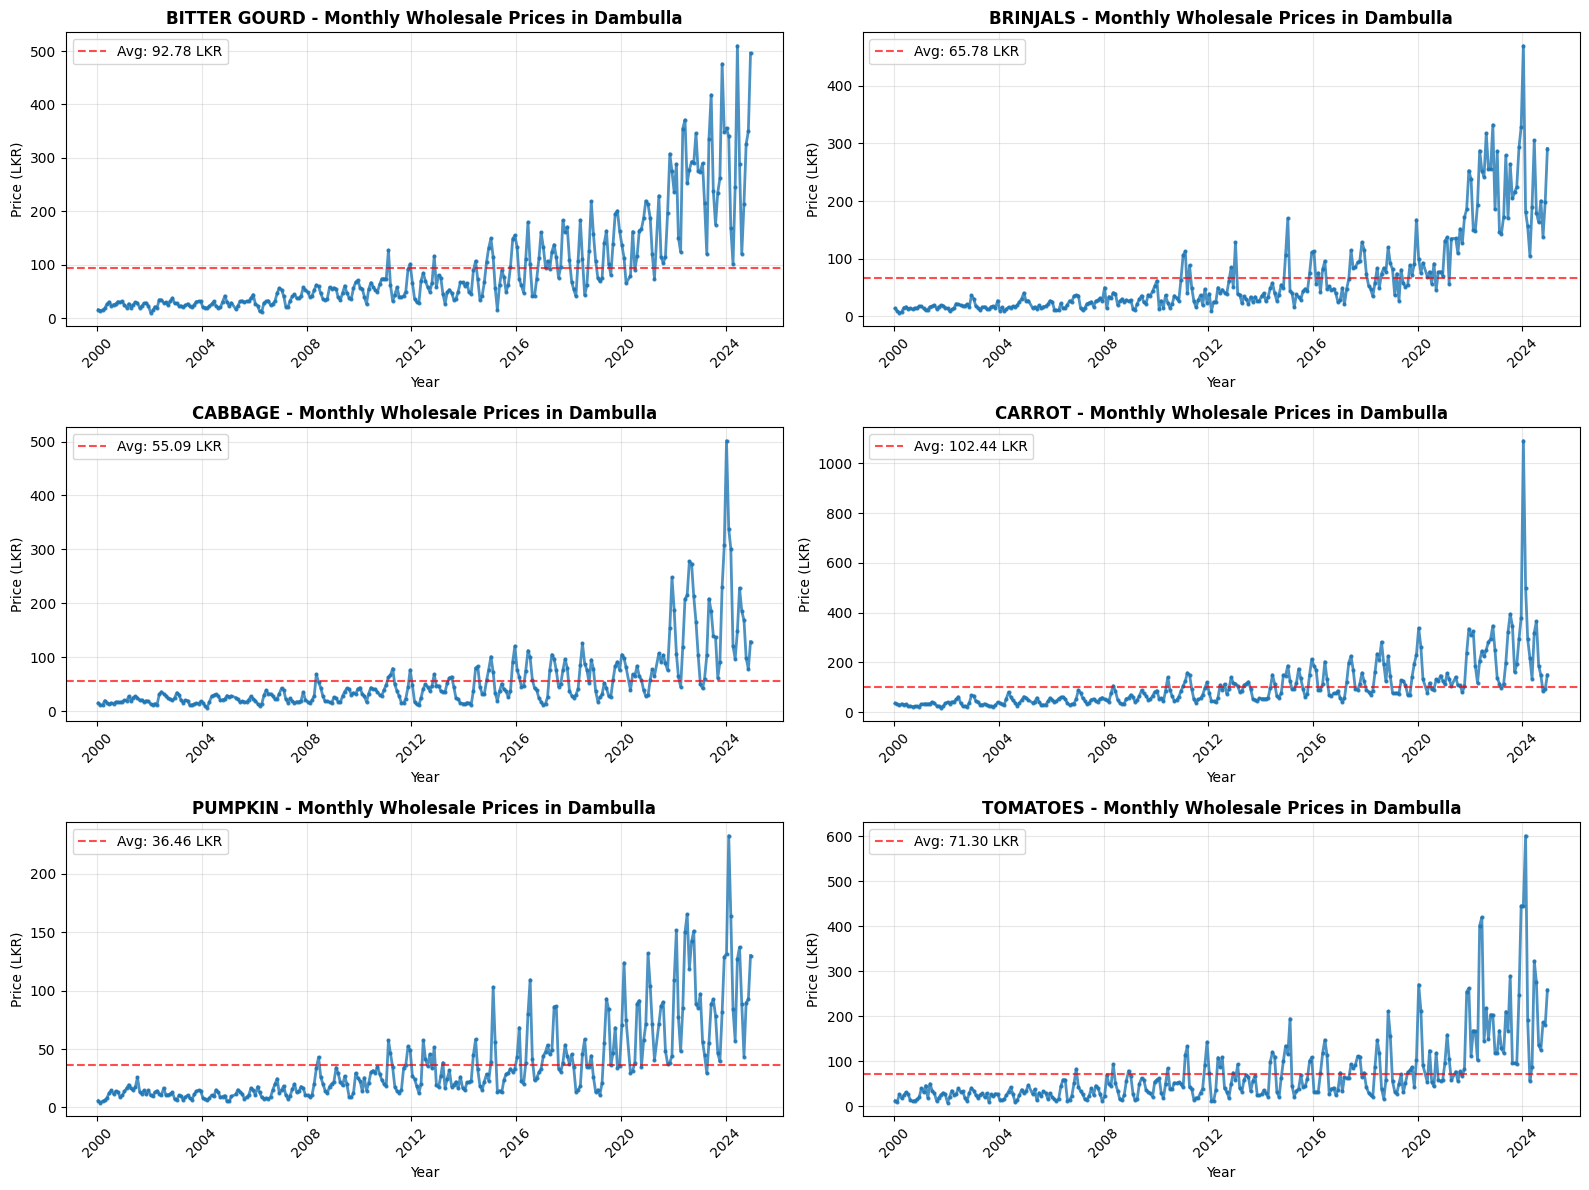

Step 11: Monthly price plots generated and saved


In [16]:
# Step 11: Create Monthly Price Visualization
plt.figure(figsize=(16, 12))

for i, veg in enumerate(vegetables, 1):
    plt.subplot(3, 2, i)

    veg_data = final_data[final_data['Variety'] == veg]

    plt.plot(veg_data['Date'], veg_data['Price'], linewidth=2, marker='o', markersize=2, alpha=0.8)
    plt.title(f'{veg} - Monthly Wholesale Prices in Dambulla', fontsize=12, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Price (LKR)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    # Add average price line
    avg_price = veg_data['Price'].mean()
    plt.axhline(y=avg_price, color='red', linestyle='--', alpha=0.7,
                label=f'Avg: {avg_price:.2f} LKR')
    plt.legend()

plt.tight_layout()
plt.savefig('data/preprocessed/monthly_price_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("Step 11: Monthly price plots generated and saved")

In [17]:
# Step 12: Final Phase 1 Completion Check
print("PHASE 1 COMPLETED SUCCESSFULLY!")
print("=" * 40)
print(f"Input file: data/raw/Wholesale.csv")
print(f"Output file: data/preprocessed/dambulla_wholesale_cleaned.csv")
print(f"Total records: {len(final_data)}")
print(f"Vegetables: {len(vegetables)}")
print(f"Time period: {final_data['Date'].min().strftime('%Y-%m')} to {final_data['Date'].max().strftime('%Y-%m')}")
print(f"Location: Dambulla")
print(f"Missing values handled: 18")
print("=" * 40)
print("Ready for Phase 2: Feature Engineering!")

PHASE 1 COMPLETED SUCCESSFULLY!
Input file: data/raw/Wholesale.csv
Output file: data/preprocessed/dambulla_wholesale_cleaned.csv
Total records: 1782
Vegetables: 6
Time period: 2000-01 to 2024-12
Location: Dambulla
Missing values handled: 18
Ready for Phase 2: Feature Engineering!
